In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Determine Successful and Unsuccessful Models

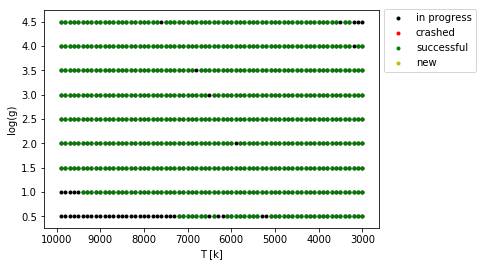

In [57]:
feh = -1

# Read in labels from input list
temp = np.load('/global/home/users/nathan_sandford/kurucz/input/grid_fehm%i.npz' % np.abs(feh))
labels = temp['labels']

# Find all successful models
khome='/global/scratch/nathan_sandford/kurucz_old'
list_models_crash = [os.path.basename(x)[:5] for x in glob.glob(khome+"/grids/at*/crash/*.atm")]
list_models_done = [os.path.basename(x)[5:10] for x in glob.glob(khome+"/grids/at*/spec/*.gz")]
list_models_done_previously = [os.path.basename(x)[5:10] for x in glob.glob(khome+"/Sync_Spectra_All_Atm_m%i/*" % np.abs(feh))]

list_models_all = []
naming_index = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
for i in range(len(labels[0])):
    if i < 10:
        model = 'aaaa' + naming_index[int(str(i)[0])]
    if i < 100 and i >= 10:
        model = 'aaa' + naming_index[int(str(i)[0])] \
            + naming_index[int(str(i)[1])]
    if i < 1000 and i >= 100:
        model = 'aa' + naming_index[int(str(i)[0])] \
            + naming_index[int(str(i)[1])] + naming_index[int(str(i)[2])]
    if i < 10000 and i >= 1000:
        model = 'a' + naming_index[int(str(i)[0])] \
            + naming_index[int(str(i)[1])] + naming_index[int(str(i)[2])] \
            + naming_index[int(str(i)[3])]
    if i < 100000 and i >= 10000:
        model = naming_index[int(str(i)[0])] \
            + naming_index[int(str(i)[1])] + naming_index[int(str(i)[2])] \
            + naming_index[int(str(i)[3])] + naming_index[int(str(i)[4])]
    list_models_all = list_models_all + [model]

list_models_crash.sort()
list_models_done.sort()
list_models_all.sort()

#fail = [list_models_all.index(x) for x in list_models_all if x not in list_models_done]
success = [list_models_all.index(x) for x in list_models_all if x in list_models_done]
success_previous = [list_models_all.index(x) for x in list_models_all if x in list_models_done_previously]
crash = [list_models_all.index(x) for x in list_models_all if x in list_models_crash]
remaining = [list_models_all.index(x) for x in list_models_all if x not in list_models_crash or list_models_done_previously or list_models_done]

remaining_labels = temp['labels'][:,remaining]
crashed_labels = temp['labels'][:,crash]
new_successful_labels = temp['labels'][:,success]
successful_labels = temp['labels'][:,success_previous]



plt.scatter(remaining_labels[0,:],remaining_labels[1,:],label='in progress',marker='.',c='k')
plt.scatter(crashed_labels[0,:],crashed_labels[1,:],label='crashed',marker='.',c='r')
plt.scatter(successful_labels[0,:],successful_labels[1,:],label='successful',marker='.',c='g')
plt.scatter(new_successful_labels[0,:],new_successful_labels[1,:],label='new',marker='.',c='y')
plt.gca().invert_xaxis()
plt.xlabel('T [k]')
plt.ylabel('log(g)')
plt.legend(bbox_to_anchor=(1., 1.03))
plt.show()

# Move successful atmospheres into "Sync_Spectra_All_Atm_m%i" % [Fe/H]

In [56]:
feh = -1

for model in list_models_done:
    atm_path = khome+'/grids/at12_'+model+'/atm/at12_'+model+'_t*.atm'
    destination = khome+'/Sync_Spectra_All_Atm_m%i/' % np.abs(feh)
    cmd = "cp "+atm_path+' '+destination
    os.system(cmd)